In [1]:
from src import genetic_algorithm,differential_evolution
from src.repository.mutation import  PolynomialM
from src.repository.cross_over import SimulatedBC
from src.repository.population import RealP
from src.repository.selection import RandomSelection
from src.repository.encoding import RealEncoding
from src.repository.cross_over import DECrossOver
from src.repository.selection import DESelection
from src.repository.selection import BinaryTS
from src.repository.mutation import DEMutation
from src.repository.population import RealPMO
from src.repository.selection import BinaryTSMO
from src.nsga import NSGAII
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from pymoo.problems import get_problem

In [2]:


def plot_pareto_front(front, objectives, title="Pareto-optimal Front", labels=None,m=2):

  fig, ax = plt.subplots()

  x = []
  y = []
  for solution in front:
    objective_values = objectives(solution.value)
    x.append(objective_values[0])
    y.append(objective_values[1])
  ax.plot(x, y, 'o-', markersize=3, label=f'Front {len(front)}')

  ax.set_xlabel(labels[0])
  ax.set_ylabel(labels[1])
  ax.set_title(title)
  ax.legend()
  plt.show()


In [3]:
def plot_pareto_front_3d(front, objectives, title="Pareto-optimal Front", labels=None, m=3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = []
    y = []
    z = []
    for solution in front:
        objective_values = objectives(solution.value)
        x.append(objective_values[0])
        y.append(objective_values[1])
        z.append(objective_values[2])

    ax.scatter(x, y, z, marker='o', label=f'Front {len(front)}')

    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.set_title(title)
    ax.legend()

    plt.show()


In [4]:

problems = [(dtlz1,'dtzl1'),(dtlz2,'dtzl2'),(dtlz5,'dtzl5'),(dtlz7,'dtzl7')
            (dtlz1_inverted,'idtzl1'),(dtlz2_inverted,'idtzl2'),(dtlz5_inverted,'idtzl5'),(dtlz7_inverted,'idtzl7')]

#ga
ga_config = genetic_algorithm.GAConfig(n_pop=100, n_iter=50, minimize=True)
crossover = SimulatedBC() 
mutation = PolynomialM(r_mut=0.8) 
encoding = RealEncoding(bounds=[(0,1)]*30)  
selection = BinaryTSMO()  
population = RealPMO()  

#DE
de_config = differential_evolution.DEConfig(n_pop=100,n_iter=3)
crossover_de = DECrossOver()
mutation_de = DEMutation()
encoding = RealEncoding()
population = RealPMO()
selection = DESelection()


for problem,name in zip(problems):
    print('Solving',name,'...')
    nsde = differential_evolution.DifferentialEvolution()
    nsga = NSGAII(cross_over=crossover, mutation=mutation, population=population, encoding=encoding, selection=selection, config=ga_config)
    results = nsga.run(problem)
    results_de = nsde.run(problem)
    plot_pareto_front(results, problem, title='Pareto-optimal ga Front '+name, labels=['f1', 'f2'])
    plot_pareto_front(results_de, problem, title='Pareto-optimal de Front '+name, labels=['f1', 'f2'])





<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
/var/folders/1t/gz6zmjq56md6qv3r8gfr643h0000gp/T/ipykernel_86191/2067556818.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  problems = [(dtlz1,'dtzl1'),(dtlz2,'dtzl2'),(dtlz5,'dtzl5'),(dtlz7,'dtzl7')
/var/folders/1t/gz6zmjq56md6qv3r8gfr643h0000gp/T/ipykernel_86191/2067556818.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  problems = [(dtlz1,'dtzl1'),(dtlz2,'dtzl2'),(dtlz5,'dtzl5'),(dtlz7,'dtzl7')
/var/folders/1t/gz6zmjq56md6qv3r8gfr643h0000gp/T/ipykernel_86191/2067556818.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  problems = [(dtlz1,'dtzl1'),(dtlz2,'dtzl2'),(dtlz5,'dtzl5'),(dtlz7,'dtzl7')


NameError: name 'dtlz1' is not defined

In [5]:


def get_bounds(problem_name):

    problem = get_problem(problem_name)
    bounds = [(problem.xl[i], problem.xu[i]) for i in range(problem.n_var)]
    return bounds

def problem(x):
    x = np.array(x)
        
    problem = get_problem('dtlz7')
    fitness_values = problem.evaluate(x)

    return fitness_values

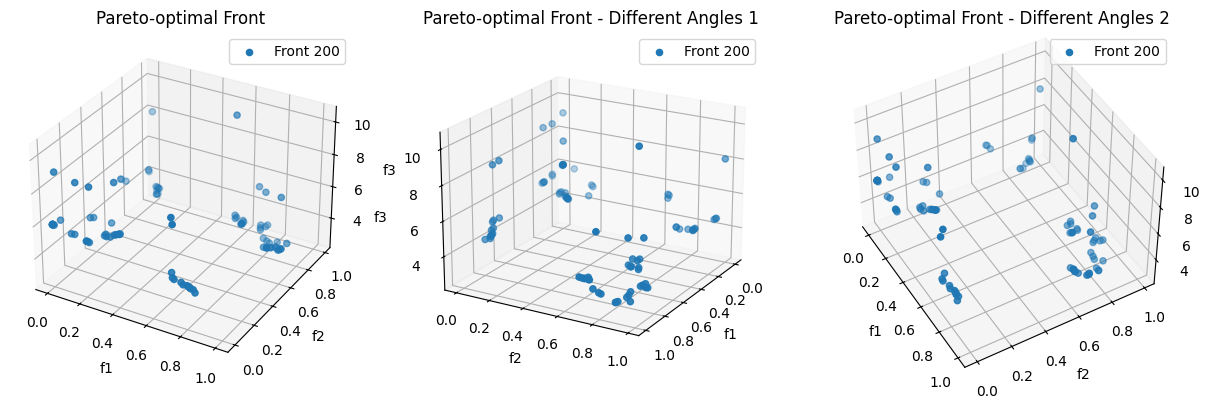

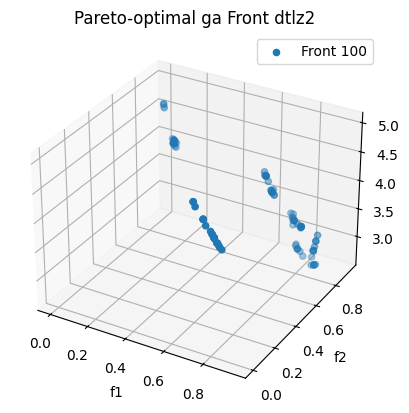

In [6]:

ga_config = genetic_algorithm.GAConfig(n_pop=100, n_iter=200, minimize=True)
crossover = SimulatedBC(r_cross=1) 
mutation = PolynomialM(r_mut=1/20) 
encoding = RealEncoding(bounds=get_bounds('dtlz7'))  
selection = BinaryTSMO()  
population = RealPMO()  

nsga = NSGAII(cross_over=crossover, mutation=mutation, population=population, encoding=encoding, selection=selection, config=ga_config)
results = nsga.run(problem)
plot_pareto_front_3d(results, problem, title='Pareto-optimal ga Front '+'dtlz2', labels=['f1', 'f2','f3'])





In [7]:
for ind in results:
    print(ind.value)

[8.66519018e-01 8.29211682e-01 0.00000000e+00 1.58646350e-04
 2.78304675e-07 3.65577920e-06 6.06679978e-06 1.21769974e-05
 5.92706110e-06 0.00000000e+00]
[8.81162530e-01 8.28539871e-01 0.00000000e+00 1.60152243e-04
 2.52644963e-07 0.00000000e+00 6.18307503e-06 6.56643534e-06
 0.00000000e+00 0.00000000e+00]
[8.81162530e-01 8.28539871e-01 0.00000000e+00 1.60152243e-04
 2.52644963e-07 0.00000000e+00 6.18307503e-06 6.56643534e-06
 0.00000000e+00 0.00000000e+00]
[8.81162530e-01 8.28539871e-01 0.00000000e+00 1.60152243e-04
 2.52644963e-07 0.00000000e+00 6.18307503e-06 6.56643534e-06
 0.00000000e+00 0.00000000e+00]
[8.40116161e-01 8.85438804e-01 2.67404591e-09 1.49863910e-05
 5.20154666e-06 6.54027985e-07 4.12242526e-09 6.35109117e-08
 1.36377911e-05 5.17487264e-03]
[8.89499515e-01 8.28157389e-01 0.00000000e+00 1.61009592e-04
 2.38036129e-07 0.00000000e+00 6.24927398e-06 3.37217631e-06
 0.00000000e+00 0.00000000e+00]
[8.11411039e-01 8.49233681e-01 0.00000000e+00 1.50962425e-04
 0.00000000e+00

In [ ]:
print(problem([0.5]*10))

[ 0.5  0.5 19.5]
